### Import relevant libraries

In [1]:
from semopy import Model, calc_stats, semplot
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import pandas as pd
import numpy as np
import seaborn as sns
from semopy.inspector import inspect


### Import the dataset

In [2]:
df = pd.read_csv("Welzijnsmonitor2025_scaled_normalised_UTF8.csv", sep=";")

### Creating the model

In [3]:
model_desc = """
# measurement model

Wellbeing =~ Bevl_1 + Bevl_2 + Bevl_3 + Cogn_Eng1_5 + Cogn_Eng1_6 + Cogn_Eng2_2 + Cogn_Eng2_3 + Cogn_Eng2_8 + Mot_Stress_1 + Mot_Stress_4 + Veer_1 + Veer_5
Energy_Sources =~ Bekendgebruik_1 + Bekendgebruik_2 + Bekendgebruik_3 + Bekendgebruik_4 + Bekendgebruik_5 + Bekendgebruik_6 + Bekendgebruik_7 + Cogn_Eng1_1 + Cogn_Eng1_2 + Cogn_Eng1_3 + Cogn_Eng1_4 + Cogn_Eng2_1 + Cogn_Eng2_4 + Cogn_Eng2_5 + Cogn_Eng2_6 + Cogn_Eng2_7 + Cogregiedocent_1 + Cogregiedocent_2 + Cogregiedocent_3 +  Cogregiedocent_4 + Cogregiedocent_5 + Cogregiedocent_6 + Extr_eng2_1 + Extr_eng2_2 + Extr_eng2_3 + Hulp_1 + Hulp_2 + Hulp_3 + Partici1_1 + Partici1_2 + Partici1_3 + Partici1_4 + Betrok_Ouders
Negative_Outcomes =~ StopInt + Vertr
Positive_Outcomes =~ Cijfer_huidig_1 + StPunt_beh + Stopint2
Stressors =~ Cantrill_1 + Leefst + Q297_1 + Onnodige_stress_1 + Onnodige_stress_2 + Onnodige_stress_3 + Onnodige_stress_4 + Onnodige_stress_5 + Onnodige_stress_6 + Onnodige_stress_7 + Onnodige_stress_8 + Onnodige_stress_9 + Onnodige_stress_10 + Pres_1 + Pres_2 + Pres_12 + Zorg_1 + Zorg_2 + Zorg_3 + Zorg_4 + Zorg_5 + Zorg_6 + Werk_1
Response_to_Stress =~ Burn1_1 + Burn1_2 + Burn1_3 + Burn1_4 + Depr_1 + Depr_2 + Depr_3 + Depr_4 + Depr_5 + Depr_6 + Depr_7 + Depr_8 + Veer_2 + Veer_3 + Veer_4 + Veer_6 + Mot_Stress_2

# Covariances (two-headed arrows in the diagram)
Stressors ~~ Energy_Sources
Response_to_Stress ~~ Wellbeing

# Regressions
Response_to_Stress ~ Stressors + Energy_Sources
Wellbeing        ~ Stressors + Energy_Sources

Negative_Outcomes ~ Response_to_Stress + Wellbeing
Positive_Outcomes ~ Response_to_Stress + Wellbeing
"""

In [4]:
model = Model(model_desc)
model.fit(df)
latent_scores = model.predict_factors(df)

# Export the model with the new latent variables and their descriptive statistics

In [5]:
latent_scores.to_csv("latent_variable_scores.csv", index=False)
latent_scores.describe()

,Energy_Sources,Negative_Outcomes,Positive_Outcomes,Response_to_Stress,Stressors,Wellbeing
count,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02,5.230000e+02
mean,-7.281195e-17,4.245595e-18,1.103855e-17,1.052907e-16,-5.604185e-17,-4.075771e-17
std,1.195835e-01,1.778756e-01,9.115139e-02,5.947406e-01,2.149507e-01,4.850639e-01
min,-4.375981e-01,-3.850838e-01,-4.236466e-01,-1.448311e+00,-6.031742e-01,-2.192251e+00
25%,-7.180056e-02,-1.249484e-01,-4.532607e-02,-4.282054e-01,-1.523771e-01,-2.391836e-01
50%,7.250726e-03,-3.092087e-02,1.161529e-02,-3.437700e-02,-9.189547e-03,6.738511e-02
75%,7.381457e-02,7.666392e-02,5.899532e-02,4.155919e-01,1.403059e-01,3.118790e-01
max,3.877032e-01,8.595080e-01,2.359739e-01,2.049119e+00,6.410709e-01,1.240447e+00


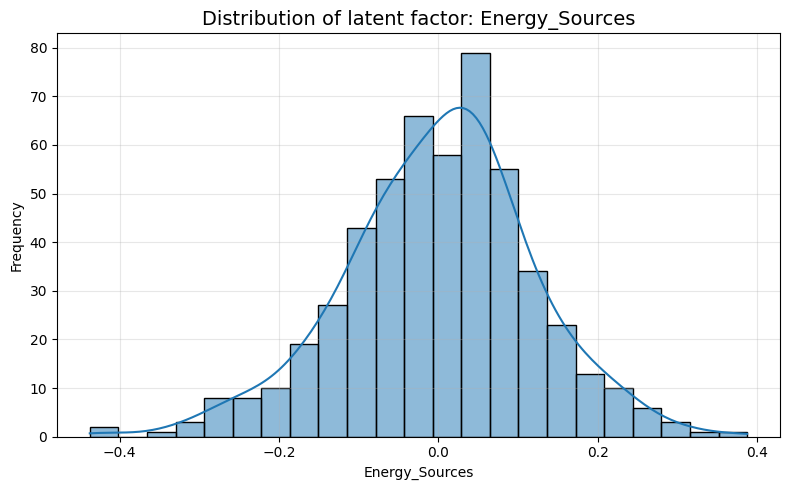

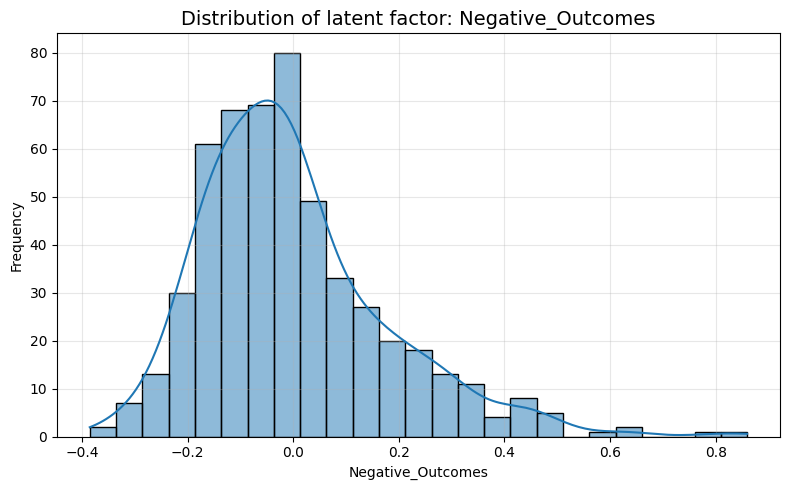

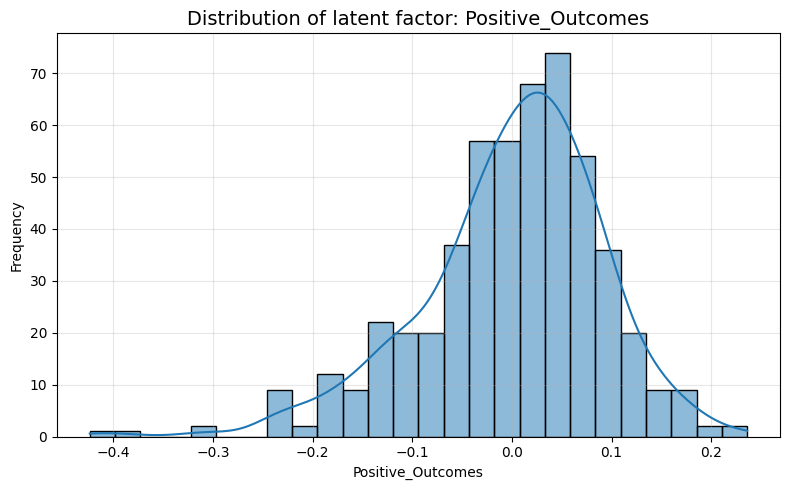

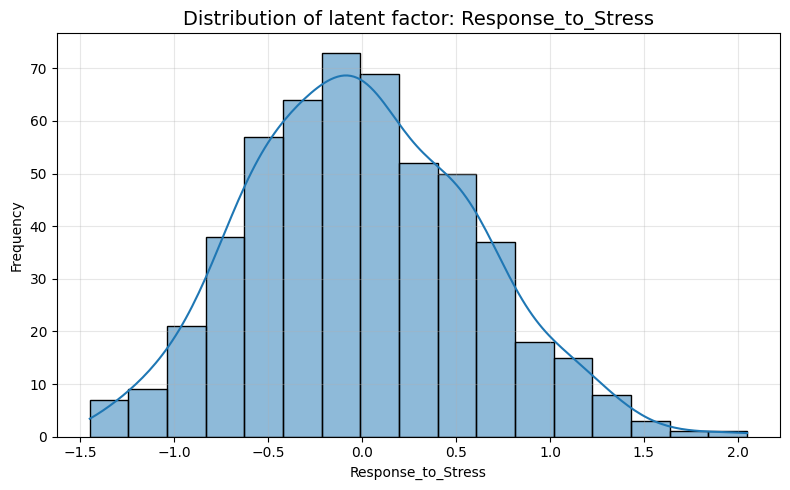

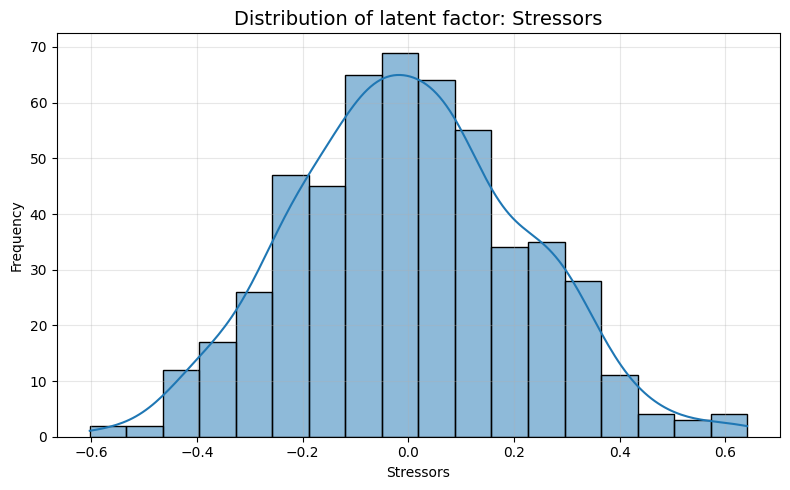

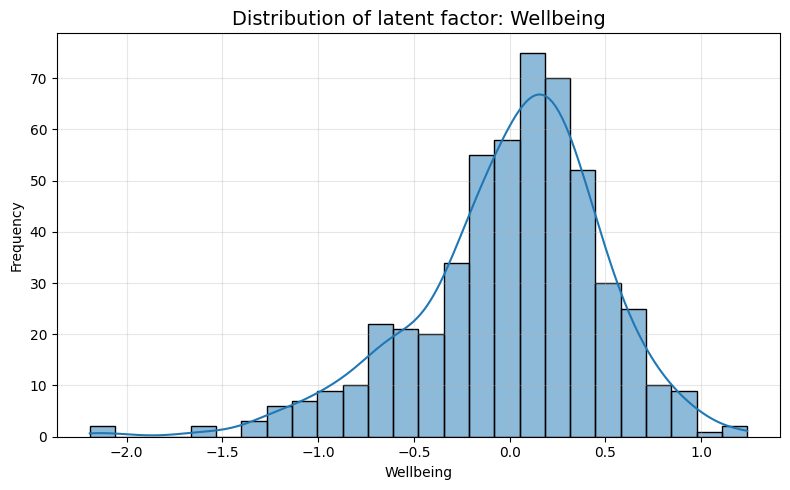

In [6]:
# Plot histogram for each latent variable
for col in latent_scores.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(latent_scores[col], kde=True)
    plt.title(f"Distribution of latent factor: {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

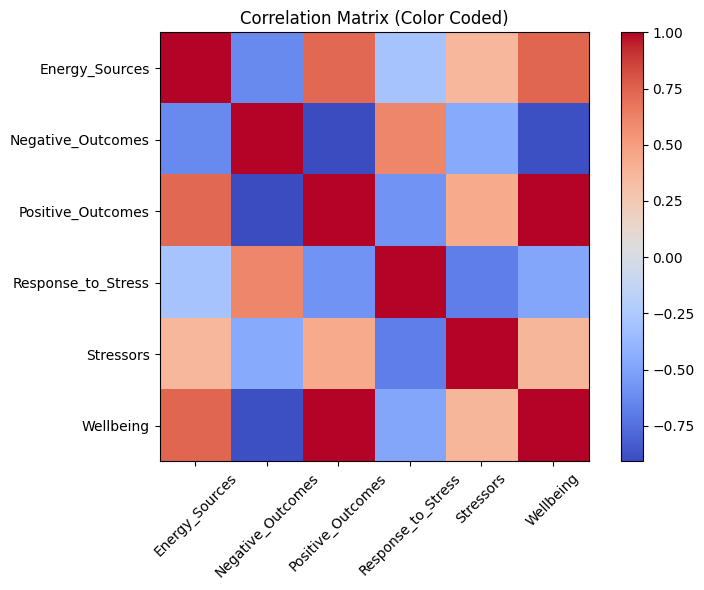

In [7]:
# Compute latent factor scores
latent_scores = model.predict_factors(df)

# Correlation matrix
corr_matrix = latent_scores.corr()
plt.figure(figsize=(8,6))
plt.imshow(corr_matrix, interpolation='nearest', cmap='coolwarm')
plt.title("Correlation Matrix (Color Coded)")
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.tight_layout()
plt.show()

# print(corr_matrix)


### Create a minmax normaliztion for latent varibles (Temporary solution but not needed for now)

In [8]:
# scaler = MinMaxScaler()

# latent_scores_normalized = pd.DataFrame(
#     scaler.fit_transform(latent_scores),
#     columns=latent_scores.columns,
#     index=latent_scores.index
# )
# df_with_latent_norm = df.copy()
# for col in latent_scores_normalized.columns:
#     df_with_latent_norm[col + "_norm"] = latent_scores_normalized[col]

# # Save if needed
# # df_with_latent_norm.to_csv("data_with_normalized_latent_variables.csv", index=False)

### Calculate fit indices

In [9]:
stats = calc_stats(model)

print("=== Model Fit Statistics ===")
print(stats.T)

=== Model Fit Statistics ===
                      Value
DoF             3905.000000
DoF Baseline    4005.000000
chi2           30552.270393
chi2 p-value       0.000000
chi2 Baseline  56457.934823
CFI                0.491978
GFI                0.458849
AGFI               0.444991
NFI                0.458849
TLI                0.478968
RMSEA              0.067180
AIC              339.613654
BIC             1350.765100
LogLik            20.193173


### Create and save the path diagram

In [14]:
g = semplot(model, "pd3.png")

In [11]:
# print(g)

In [12]:
# Extract model coefficients
coefficients = model.inspect()
coefficients.to_csv("model_coefficients.csv")
coefficients.to_excel("model_coefficients.xlsx")


In [13]:
# regressions
# Stressoren ~ Energiebronnen
# Energiebronnen ~ Stressoren

# Stressreacties ~ Stressoren + Energiebronnen + Welbevinden
# Welbevinden ~ Stressoren + Energiebronnen + Stressreacties

# Positieve_Uitkomsten ~ Welbevinden + Stressreacties
# Negatieve_Uitkomsten ~ Welbevinden + Stressreacties